In [1]:
"""Suppose you pose a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than an
expert’s answer. This is called the wisdom of the crowd"""

'Suppose you pose a complex question to thousands of random people, then aggregate\ntheir answers. In many cases you will find that this aggregated answer is better than an\nexpert’s answer. This is called the wisdom of the crowd'

In [2]:
"""A group of predictors is called an ensemble"""

'A group of predictors is called an ensemble'

In [3]:
#An ensemble learning algorithm is called ensemble method

Random Forests

In [4]:
"""You can train a group of Decision Tree classifiers each on a different random subset of the training set. To make predictions you obtain the predictions of all the individual trees, then predict the class that gets the most votes this is known as a random forest"""

'You can train a group of Decision Tree classifiers each on a different random subset of the training set. To make predictions you obtain the predictions of all the individual trees, then predict the class that gets the most votes this is known as a random forest'

In [15]:
#taking the best out of the predictions from independent model predictions
#We are using here the moon dataset

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
data = make_moons(n_samples=10000)
X,y =data[0],data[1]
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [14]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [18]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8856
RandomForestClassifier 0.9996
SVC 1.0
VotingClassifier 0.9996


In [19]:
"""If all classifiers are able to estimate class probabilities (i.e., they all have a
predict_proba() method), then you can tell Scikit-Learn to predict the class with the
highest class probability, averaged over all the individual classifiers. This is called soft
voting"""

'If all classifiers are able to estimate class probabilities (i.e., they all have a\npredict_proba() method), then you can tell Scikit-Learn to predict the class with the\nhighest class probability, averaged over all the individual classifiers. This is called soft\nvoting'

In [20]:
#Voting = 'hard' votes for the class
#Voting = 'soft' votes for the class probabilities

Bagging and Pasting

In [4]:
from sklearn.datasets import make_moons
data = make_moons(n_samples=10000,shuffle=True)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [5]:
X,y = data[0],data[1]

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [7]:
y_pred = bag_clf.predict(X_test)

Out of Bag Evaluation

In [8]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,bootstrap=True, n_jobs=-1,oob_score=True)

In [9]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [13]:
bag_clf.oob_score_

0.9995

In [14]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)
bag_clf.oob_decision_function_

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Random Patches and Random Subspaces

In [15]:
"""Sampling both training instances and features is called the Random Patches method"""

'Sampling both training instances and features is called the Random Patches method'

In [16]:
"""But keeping alll training instances but sampling features is called the Random Subspaces """

'But keeping alll training instances but sampling features is called the Random Subspaces '

Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rnd = rnd_clf.predict(X_test)

In [18]:
#Also the Bagging Classifier can be used as a random forest classifier by adding splitter='random'

Extra-Trees

In [19]:
"""A forest of such extremely random trees is called an Extremely Randomized Trees"""

'A forest of such extremely random trees is called an Extremely Randomized Trees'

Feature Importance


In [2]:
#sklearn automaticallly computes the feature importances of a dataset 
# For example

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
data = load_iris()
rnd_clf  = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(data['data'],data['target'])
for name, score in zip(data['feature_names'],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.092629454858112
sepal width (cm) 0.024636436207556275
petal length (cm) 0.43639402565780566
petal width (cm) 0.4463400832765261


In [2]:
#from the above one can clearly see that the petal width and petal length are the most important features of the dataset

Boosting

In [3]:
#The main boosting methods are AdaBoost or adaptive boosting and the Gradient boosting

In [4]:
#AdaBoost

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

Gradient Boosting

In [ ]:
#Another very popular boosting algorith is Gradient Boosting Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residula errors made by teh previous predictor.

In [3]:
X = data['data']
y = data['target']

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_reg1 = DecisionTreeClassifier(max_depth=2)
tree_reg1.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [8]:
y2 = y = tree_reg1.predict(X)
tree_reg2 = DecisionTreeClassifier(max_depth=2)
tree_reg2.fit(X,y2)
y3 = y2  = tree_reg2.predict(X)
tree_reg3 = DecisionTreeClassifier(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeClassifier(max_depth=2)

In [9]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6,
       6, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [11]:
#The easier way to do is is to use the sklearn Gradient Boosting Regressor package

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1)

In [5]:
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1, n_estimators=3)

In [6]:
#Implementation of early stopping
#One way to do that is by using staged_predict() method

#That is to find the optimal number of estimators and fit the model with it

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train,y_train)

errors = [mean_squared_error(y_test,y_pred) for y_pred in gbrt.staged_predict(X_test)]


In [8]:
best_n_estimators = np.argmin(errors) + 1
best_n_estimators

29

In [9]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=29)

In [10]:
np.c_[errors,[i for i in range(len(errors))]]

array([[6.18609401e-01, 0.00000000e+00],
       [5.21022984e-01, 1.00000000e+00],
       [4.30262233e-01, 2.00000000e+00],
       [3.66004784e-01, 3.00000000e+00],
       [3.11671125e-01, 4.00000000e+00],
       [2.61593589e-01, 5.00000000e+00],
       [2.27045704e-01, 6.00000000e+00],
       [1.99305215e-01, 7.00000000e+00],
       [1.77054386e-01, 8.00000000e+00],
       [1.59228285e-01, 9.00000000e+00],
       [1.44966507e-01, 1.00000000e+01],
       [1.32978176e-01, 1.10000000e+01],
       [1.23911703e-01, 1.20000000e+01],
       [1.16211818e-01, 1.30000000e+01],
       [1.10516659e-01, 1.40000000e+01],
       [1.04874787e-01, 1.50000000e+01],
       [1.00381610e-01, 1.60000000e+01],
       [9.68112021e-02, 1.70000000e+01],
       [9.72804615e-02, 1.80000000e+01],
       [9.34846958e-02, 1.90000000e+01],
       [9.03302123e-02, 2.00000000e+01],
       [8.77031588e-02, 2.10000000e+01],
       [8.63171300e-02, 2.20000000e+01],
       [8.44416665e-02, 2.30000000e+01],
       [8.164315

(-10.0, 50.0, -0.02, 0.025)

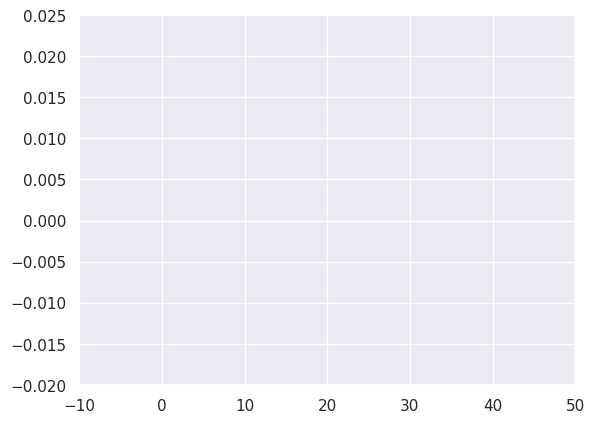

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot([i for i in range(len(errors))], errors)
plt.axis([-10,50,-0.02,0.025])

In [12]:
#It can also be done using warm_start = true

In [13]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=True)

min_val_error = float('inf')
going_up = 0
for n_estimators in range(1,1000):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train,y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test,y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
    else:
        going_up += 1
        if going_up == 5:
            break #Early stopping

In [14]:
min_val_error, going_up

(0.07874170057215014, 5)

In [15]:
gbrt.n_estimators    #best estimator with lower meansquarederror

33

In [1]:
#GradientBoostingRegressor class also supports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree. For examplt if subsample=0.25 then each tree is trained on 25% of the training instances, selected randomly. As you can probably guess by now this technique trades a higher bias for a lower variance. It also speeds up training considerably. This is called Stochastic Gradient Boosting

In [20]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

In [22]:
#XGBoost also offers several nice features, such as automatically taking care of early stopping

xgb_reg.fit(X_train, y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=2)

y_pred = xgb_reg.predict(X_test)

#Early stopping implemented

[0]	validation_0-rmse:0.76338
[1]	validation_0-rmse:0.59392
[2]	validation_0-rmse:0.48299
[3]	validation_0-rmse:0.41963
[4]	validation_0-rmse:0.37897
[5]	validation_0-rmse:0.35667
[6]	validation_0-rmse:0.33647
[7]	validation_0-rmse:0.33163
[8]	validation_0-rmse:0.32932
[9]	validation_0-rmse:0.32829
[10]	validation_0-rmse:0.32790
[11]	validation_0-rmse:0.32957


/home/susearc/miniconda3/envs/pylatest/lib/python3.11/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Stacking

In [23]:
#The last ensemble method we will discuss in this chapeter is called stacking shor of stacvked generalization. It is based on a simple idea: instead of using trivial function such a shared voting to aggregate the prediction sof all predictor in an ensemble, why dont we train a model to perfform this aggregation?,. Fig 7-12 show such an ensemble performing a regression task ona new instance. Each of the bottom three predictors predicts a different value and then the final predictor called a blender or a meta learner takes these prdictions as inputs and makes the final prediction.

![Alt text](Screenshot%20from%202022-11-21%2010-23-28.png)

In [24]:
#To train the blender, a common approach is to use a hold-out set. Lts see hoow it works. First the training set is split into two subsets the first subset is used to train the predictors in the first layer

In [25]:
#It si actually possible to train several different blenders this way. To get a whole layer of blenders. The trick is to split the training set into three subsets: the first one is used to train the first layer the second one is used to create the training set used to train the second layer and the third one is used to create the training set to train the third layer. Once this si done we can make a prediction for a new instance by going through each layer sequentially

Excercises

In [26]:
#There is no way to combine these models, But their predictions can be voted against each other to select the best prediction out of the five. And thus create a prediction set which has more accuracy that the five models.

In [27]:
#2 Hard voting entails selecting the highest voted prediction, whereas the soft voting combines the probabilities of each predictions of each model then selecting the prediction with highest value

In [28]:
#3 since bagging selects samples out of the training dataset and creates a model out of it if each model is trained on a separate machine the process will be far faster.

#4 When data is sampled out of the training set with repitition, some of the data is left out, This is known as out of bag. The model trained over the samples are then evaluated with this leftover dataset.

In [29]:
#5 Random trees use bootstrap replicas to sample out the dataset with replacement, And when it classifies the dataset it is based on calculation/optimization. But when extremely random trees are used it selects the whole training set and trains the model on it by default, However this can be changed with an optional parameter
            #Extra-trees also splits the nodes randomly and without optimizations.

            #Extra trees are faster than the regular random forests because it avoids the calculation to calculate the optimal split



            

In [30]:
#6 In AdaBoost ensemble the two major hyperparameters we can tweak is the learning_rate and the n_estimators. If the ensemble underfits the training data it means it is omitting/missing/underestimating the feature importances. We can try to improve the n_estimators to include more estimators in the dataset as well as decreasing the learing rate to make a good fit

#7 Like the previous model if the ensemble overfits the data we should reduce the n_estimators. Should the estimators be low we can increase the learning rate hyperparameter to check if the model reduces the overfitting.

In [ ]:
#8

from joblib import memory
location = './sklearn_data'
memory = memory.Memory(location)
from sklearn.datasets import fetch_openml
data = fetch_openml('mnist_784')
memory.cache(data)

In [63]:
import pandas as pd
X = data['data'].to_numpy()
y = data['target'].to_numpy()
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_val, X_test, y_train, y_val, y_test = X[:50000],X[50000:60000], X[60000:],y[:50000],y[50000:60000], y[60000:]

In [67]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC